# Importing required libraries

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # acce 


In [ ]:
pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32913 sha256=91af5b3c00b93dff29391ba2e628faed1a8b16d723ec607149802351c0830c0a
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import spacy

In [ ]:
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

# loading dataset

In [ ]:
data = pd.read_csv("Aspect.csv")

In [ ]:
data.shape

(902, 1)

In [ ]:
data = data.loc[:10000]

In [ ]:
data.shape

(902, 1)

In [ ]:
data.head()

,Aspects
0,['product']
1,['clothes']
2,"['product', 'photo', 'trust']"
3,['colour']
4,"['type', 'fabrics']"


In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head(10)

,Aspects
0,['product']
1,['clothes']
2,"['product', 'photo', 'trust']"
3,['colour']
4,"['type', 'fabrics']"
5,"['price', 'market']"
6,['quality']
7,"['son', 'size']"
8,['fiting']
9,"['quality', 'fabric']"


In [ ]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 902 rows and 1 columns


# removing urls 

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [ ]:
data["Aspects"] = data["Aspects"].apply(lambda text: remove_urls(text))

In [ ]:
data

,Aspects
0,['product']
1,['clothes']
2,"['product', 'photo', 'trust']"
3,['colour']
4,"['type', 'fabrics']"
...,...
897,"['shirts', 'pants', 'quality', 'quality', 'shirts', 'pants']"
898,"['purchase', 'product', 'product', 'quality', 'material', 'price', 'thise', 'product', 'purchase', 'future']"
899,"['order', 'order']"
900,"['knee', 'side']"


In [ ]:
top_N = 1000 #top 100 words

#convert list of list into text
a = data['Aspects'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

# removing stop words

In [ ]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [ ]:
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [ ]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]

# Getting top frequent words

In [ ]:
word_dist = nltk.FreqDist(lemmatized_output)
top1000_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
top1000_words

,Word,Frequency
0,product,395
1,quality,348
2,size,150
3,colour,108
4,material,101
...,...,...
491,function,1
492,diz,1
493,finish,1
494,thise,1


In [ ]:
top1000_words.to_csv('Frequent.csv')

# Plotting frequent words

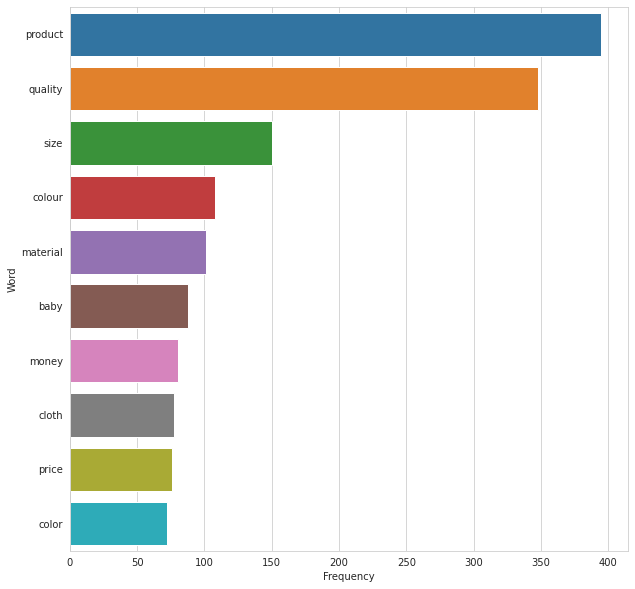

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

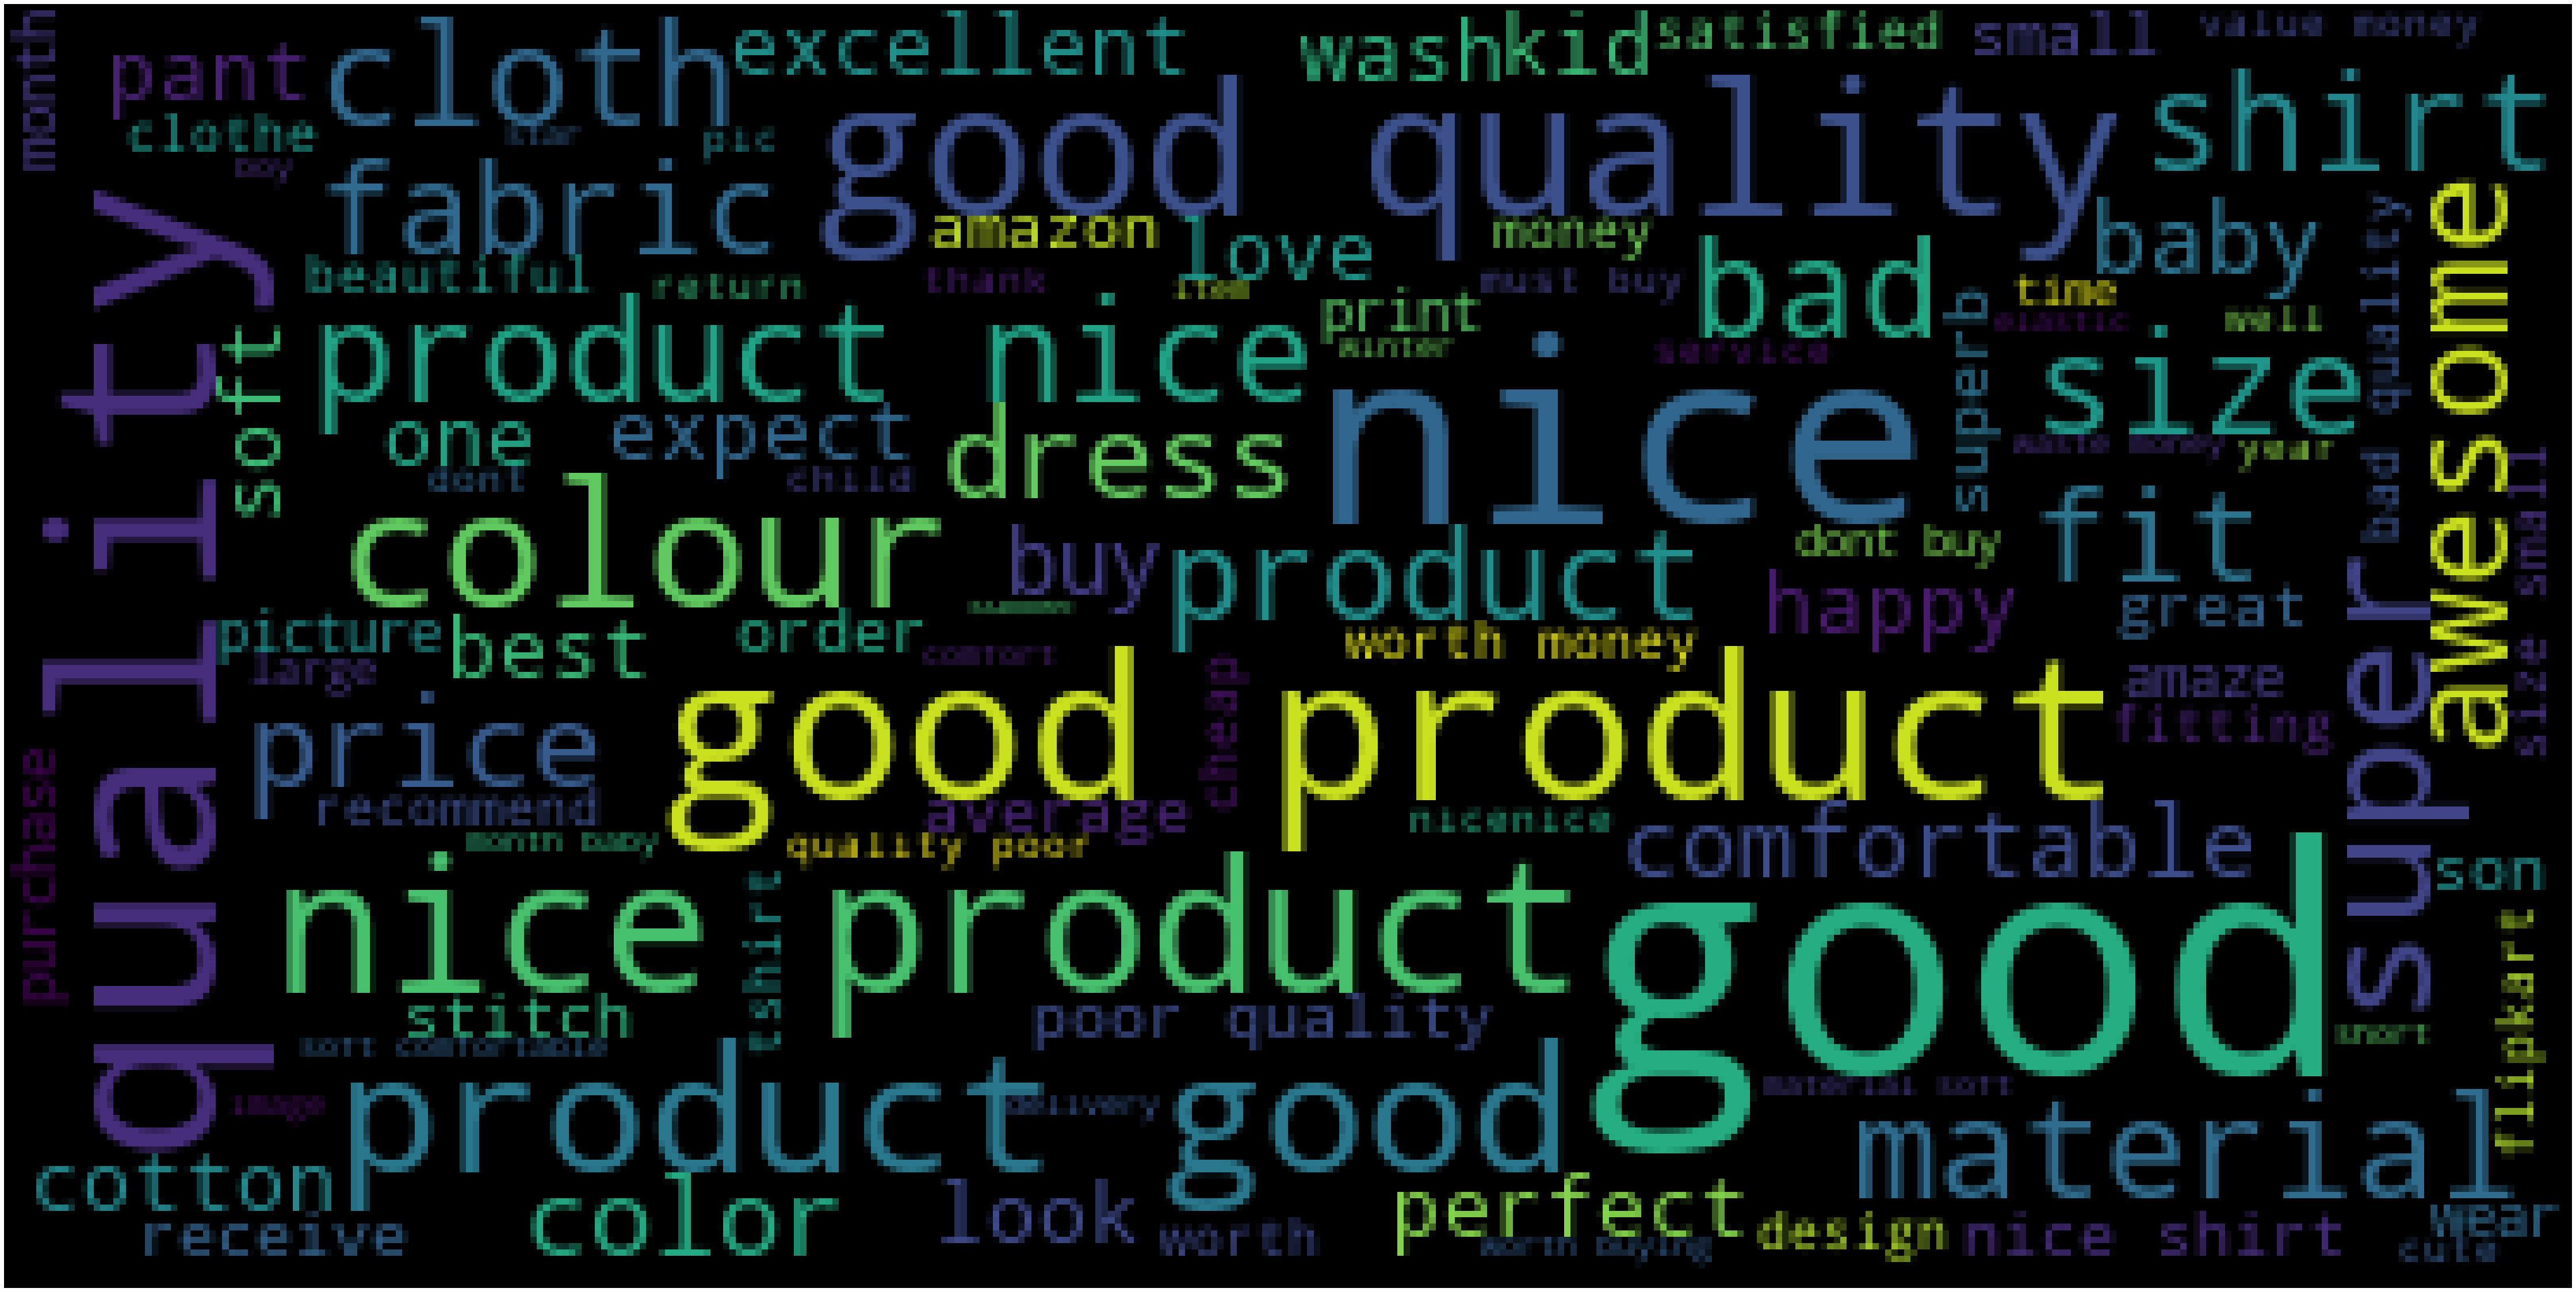

In [ ]:
wc(lemmatized_output,'black','Common Words' )

In [ ]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

# printing sentiment polarity scores

In [ ]:
data["Polarity"] = data["review"].apply(sentiment)

In [ ]:
data

,Unnamed: 0,review,Polarity
0,0,excellent look,0.5719
1,1,good product,0.4404
2,2,nice dress,0.4215
3,3,loved clothes,0.5994
4,4,really product photo satisfied trust maintained,0.7479
...,...,...,...
2547,2547,cheapcheap,0.0000
2548,2548,colour faded pic the colour faded,0.0000
2549,2549,very bandit tear knee side,0.0000
2550,2550,size small size small,0.0000


In [ ]:
def senti(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [ ]:
data['Sentiment'] = data.apply(senti, axis=1)

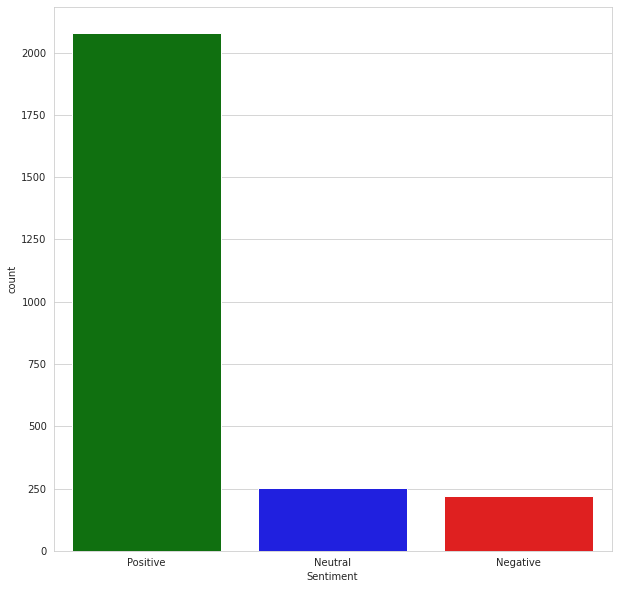

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=data, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

In [ ]:
#import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens 
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
data["Aspects"] = data["review"].apply(pos)

In [ ]:
data

,Unnamed: 0,review,Polarity,Sentiment,Aspects
0,0,excellent look,0.5719,Positive,[]
1,1,good product,0.4404,Positive,[product]
2,2,nice dress,0.4215,Positive,[]
3,3,loved clothes,0.5994,Positive,[clothes]
4,4,really product photo satisfied trust maintained,0.7479,Positive,"[product, photo, trust]"
...,...,...,...,...,...
2547,2547,cheapcheap,0.0000,Neutral,[]
2548,2548,colour faded pic the colour faded,0.0000,Neutral,[colour]
2549,2549,very bandit tear knee side,0.0000,Neutral,"[knee, side]"
2550,2550,size small size small,0.0000,Neutral,"[size, size]"


In [ ]:
data.to_csv('Frequent,sentiment and aspects.csv')

In [ ]:

data1 = pd.read_csv("ReviewAspect.csv")
data1

,Sentiment,Aspects
0,Positive,[]
1,Positive,['product']
2,Positive,[]
3,Positive,['clothes']
4,Positive,"['product', 'photo', 'trust']"
...,...,...
2547,Neutral,[]
2548,Neutral,['colour']
2549,Neutral,"['knee', 'side']"
2550,Neutral,"['size', 'size']"


In [ ]:
rows = data1.loc[["Negative"]]
rows

,Aspects
Sentiment,
Negative,"['quality', 'fabric']"
Negative,"['quality', 'cloth']"
Negative,['packing']
Negative,['color']
Negative,['quality']
...,...
Negative,"['difference', 'image', 'reality']"
Negative,"['quality', 'dislike']"
Negative,"['shirts', 'pants', 'quality', 'quality', 'shirts', 'pants']"


In [ ]:
rows.to_csv('aspects_in_neg.csv')

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [ ]:
top_N = 10

df = pd.read_csv("aspects_in_neg.csv")
df

,Sentiment,Aspects
0,Negative,"['quality', 'fabric']"
1,Negative,"['quality', 'cloth']"
2,Negative,['packing']
3,Negative,['color']
4,Negative,['quality']
...,...,...
215,Negative,"['difference', 'image', 'reality']"
216,Negative,"['quality', 'dislike']"
217,Negative,"['shirts', 'pants', 'quality', 'quality', 'shirts', 'pants']"
218,Negative,"['purchase', 'product', 'product', 'quality', 'material', 'price', 'thise', 'product', 'purchase', 'future']"
